# Data Exploration

In [1]:
from python_path import PythonPath

with PythonPath(relative="../src"), PythonPath(relative=".."):
    import dataset
    import preprocessing as pr
    import pandas as pd
    from IPython.display import Image
    from plotly import offline as py, graph_objs as go
    from dicto import dicto
    from matplotlib import pyplot as plt
    import cytoolz as cz
    import numpy as np
    import utils
    
params = dicto.load_("../params.yml")    

py.init_notebook_mode()

/code/src
/code


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/code/notebooks


#### Get Data

In [2]:
df = dataset.get_base_df("../data/base")
print(df.columns)

Index(['@verified', 'folder', 'filename', 'path', 'source', 'size',
       'segmented', 'object', 'id', 'n_wheels', 'n_hoe', 'n_body'],
      dtype='object')


#### Class Balance

In [3]:
n_wheels = df.n_wheels.sum()
n_hoe = df.n_hoe.sum()
n_body = df.n_body.sum()

In [4]:
py.iplot([
    go.Pie(
        labels = ["wheels", "hoe", "body"], 
        values = [n_wheels, n_hoe, n_body]
    )
])

## Data Augmentation

In [5]:
generator = utils.dataframe_batch_generator(df, 30)
generator = pr.read_images(generator)
generator = pr.data_augmentation(generator, params = params)
batch = next(generator)

/code/src/preprocessing.py:89: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/code/src/preprocessing.py:101: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:418: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



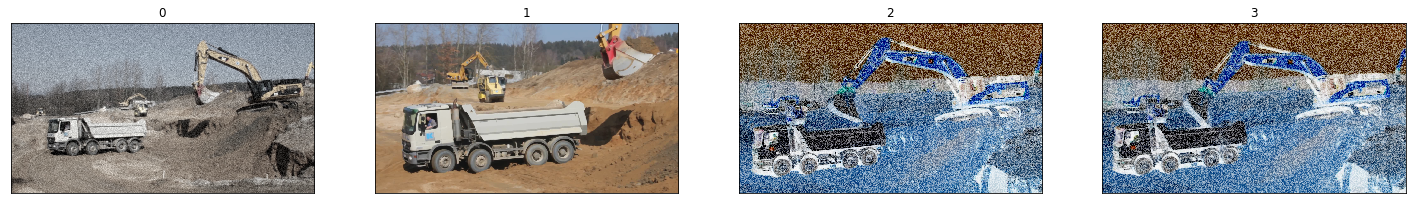

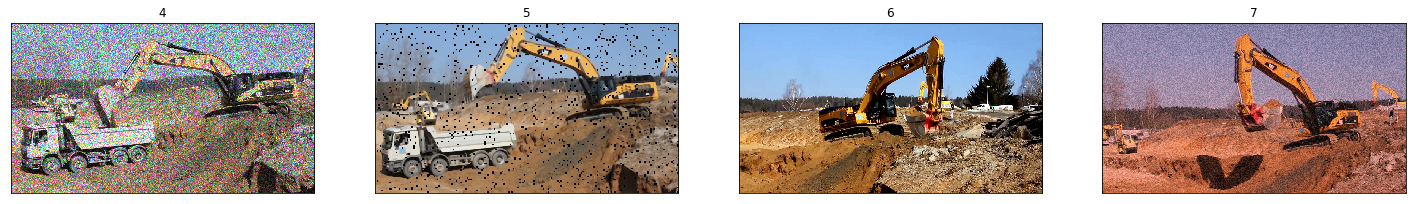

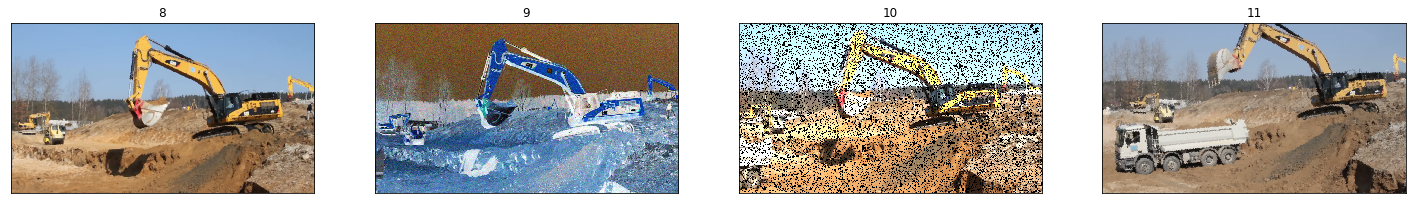

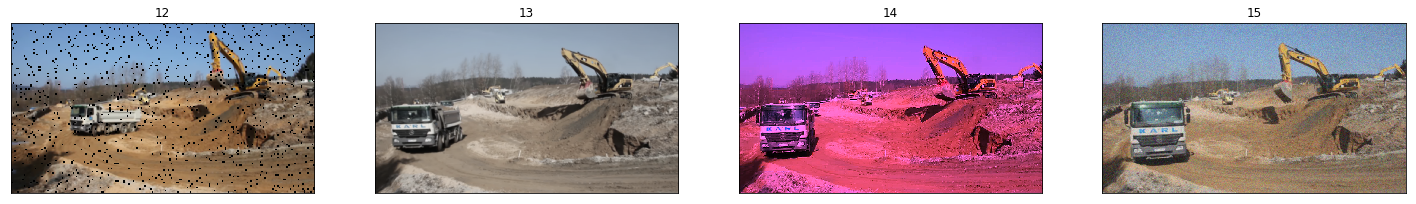

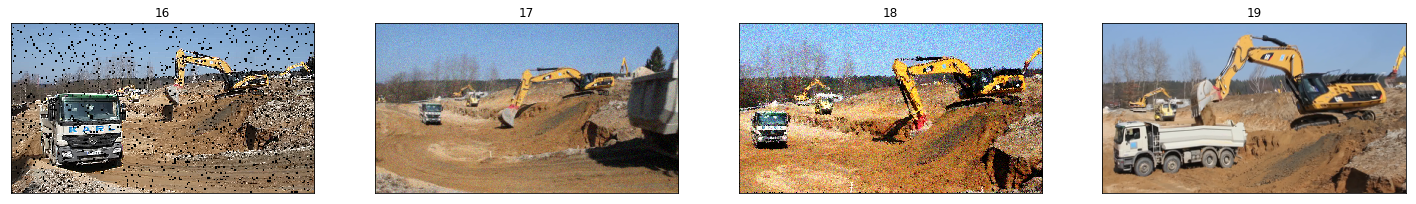

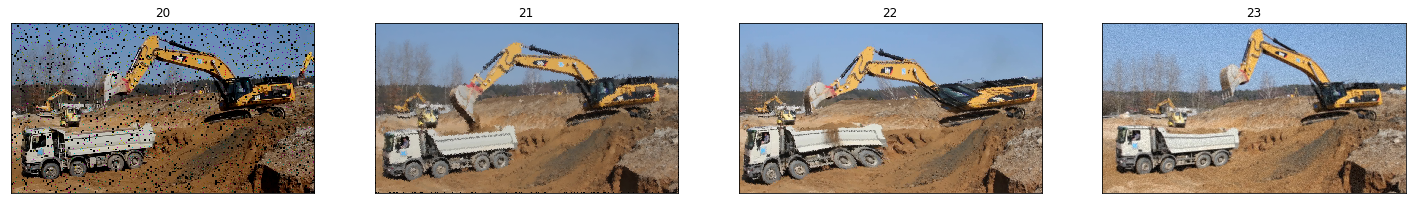

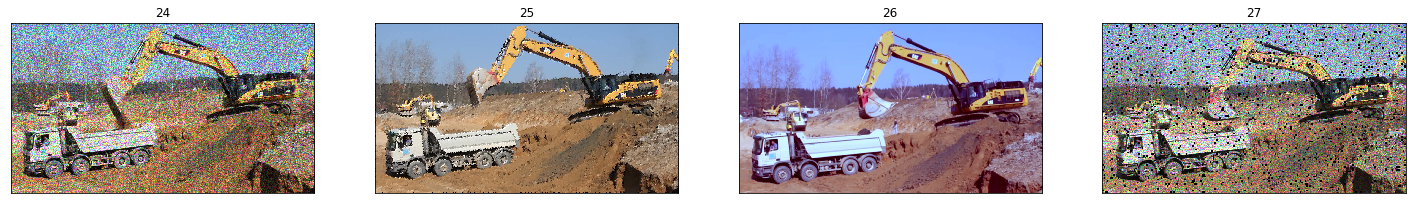

In [6]:
parts = 4

for iterator in cz.partition(parts, batch.iterrows()):

    fig, axes = plt.subplots(1, parts, subplot_kw=dict(), figsize=(25, 20))

    for i, (idx, row) in enumerate(iterator):


        img = np.squeeze(row.image).astype(np.uint8)

        axes[i].imshow(img, cmap="gray")
        axes[i].title.set_text(row.name)
        axes[i].get_yaxis().set_visible(False)
        axes[i].get_xaxis().set_visible(False)

    fig.show()

plt.show()